# E-102 Graduate Project

## Student: Simeon M. Greene

This is a study of global obesity rates for the year 2014. The main original data source for obesity rates is http://apps.who.int/gho/data/view.main.2450A?lang=en . NOTE: Although the original data source is from the WHO, the CSV file used in this project was downloaded from https://data.world/health/global-obesity-rates-2014
This document was created with Jupyter Notebook for R. Code is interspersed with plots and markup making it easy to see both the data and the code that processes it. The source notebook and all accompanying data can be found on my github repository: https://github.com/sgreene/global-obesity

## Introduction
Obesity is a serious non-comunicable medical condition where a person has excess body fat that may ultimately contribute to other serious medical conditions. It is cited as a factor in many non-comunicable, prevantable diseases such as diabetes, hypertension, and heart disease. Some factors contributing to obesity are diet, physical activity and genetic susceptibility. 
Accoring to the World Health Organization (WHO), over 600 million of the world's population are obese and most people live in countries where obesity kills more people than being underweight.  Although the measurements and definitions for obesity may differ slightly in various world regions, the data in this study uses the measurement of $BMI \geq 30$. 
This study compares obesity rates in geographic regions and between the sexes. It also looks at the effects of physical activity, a factor in the disease, on obesity rates. By comparing geographic regional rates of obesity we may uncover differences in diets and genetic susceptibility. To some extent there may also be regional differences in physical activity. For example, in some regions walking to-from work/school may be a more common activity than in others. The economic status (not covered in this study) may yet be another implicit factor as more industrialized nations may have better access to television and entertainment that detract from physical activity. 
This study hopes to answer a few questions about where in the world obesity is of particular concern and to a lesser extent why.

## Methods
The data in this study was collected from a variety of data sources:

1. Data.Word (https://data.world/health/global-obesity-rates-2014): data.world is a free data repository, hosting a large collection of public datasets. The global obesity rates available at this location were originally pulled from the WHO site but in a more ready-to-use format.

2. World Health Orginization: The World Health Orginzation is an agency of the United Nations that specializes in international public health. The organization provides many of its datasets and surveys for free online. This study makes use of the Prevalence of Insufficient Physical Activity data set (http://www.who.int/gho/ncd/risk_factors/physical_activity/en/) which shows the prevalence of low physical activity, a contributing factor to obesity, world wide.

3. Country to Region Mapping: The orginal dataset provides only country information. However, because some patterns in obesity may be regional rather than country specific, an additional data feature was added that mapped country to one of five geographic region. This data was downloaded from a public git repository: https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv

Once data sources were identified, the final data set to analyze was constructed. The Global Obesity Rates (1) were merged with the Country to Region Mapping (3) using the 'merge' command in R. The Country column from (1) and the name column from (2) were used for the merge joins. The Physical Activity data (2) posed an additional problem in that the values for physical activity contained confidence intervals as additional text. This would cause a parsing issue in R so python was used to strip the extraneous data from columns and a new 'cleaner' dataset was produced and saved to CSV. Finally the cleaned Physical Activity data was merged with (1 & 2) using R. The country column was used for the merge join.

Various analyses were performed on the datasets:

1. [Ranking obesity](#ranking): What are the top n countries with high obesity rates? What are the bottom n countries with obesity rates? These questions are answered with visualizations (bar charts) as well as descriptive statistics. Two bar charts are presented in the [Ranking Obesity](#ranking) section. The first chart shows the top 15 countries ranked by obesity. The x axis represent percentage of people obese and the y axis represents the country name. The second chart shows the bottom 15 countries ranked by obesity. The x and y axes are the same as the previous chart.<br>The mean rate of obesity in the top 15 countries was **41.65** with a standard deviation of **4.37** whereas the mean rate in the lower 15 countries was **3.56** with a standard deviation of **0.76**.
2. [Regional comparisons](#regional): A visualization of obesity rates across five geographic regions is presented along with descriptive statistics. In this section we first look at a visual representation of the regional differences uing a box plot.<br>From the chart in this section it is clear that the Oceania region has the highest rates of obesity with a median obesity rate of just around 40% for both sexes. <br>The regional visualization also shows that the Asia region, while having the 2nd lowest median obesity rate, has the widest range of obesity values.<br>Although the visualization shows that the Asia region has a lower median obesity rate than the Americas region, the variance seemed rather high in the former so a comparison of means was attempted to see if the average rate of obesity in both regions. Another reason to do this comparison was to investigate a common claim that people in this region are significantly less obese due to better diets and higher physical activity. The following steps were taken in analyzing differences between these regions:<br>
    (i) The variance between the two regions (Asia and The Americas) were compared using an F test to test whether $H_{0}: \sigma_{1}^2 = \sigma_{2}^2$ or $H_{1}: \sigma_{1}^2 \neq \sigma_{2}^2$ The F test showed that the variance in obesity data between these two regions is significant and therefore the subsequent 2-sample hypothesis test with unequal variances was used.<br>
    (ii) Using the t.test function in R a two-sided, two sample test of unequal variances was performed. With a resulting p-value of 0.0001738 the null hypothesis can be rejected and the average rate of obesity in the two regions can be considered significantly different. This confirms what can be observed in the box plots, i.e. the Asia region has a much lower rate of obesity than that of the Americas.
3. [Physical Inactivity](#inactivity): According to the WHO (http://www.who.int/gho/ncd/risk_factors/physical_activity_text/en/) physical inactivity is one of the top ten leading risk factors for global mortality. Other research shows there may be a link between physical inactivity and obesity. To analyse this relationship a plot of Physical Inactivity vs Obesity Rates was constructed. The chart color codes each point based on geographical region to give the viewer a better idea of the layout of the datapoints (coloring by country would be fairly unreadable). It can be clearly seen from the chart that there is some linear relationship between these two variables. Using the lm function in R a linear regression model was constructed and a line fited to the data. Based on the linear summary there does appear to be a strong correlation between physical inactivity and obesity.

## Overall Conclusions
The analyses done in this paper provide the following conclusions:
1. Obesity rates can differ significantly based on geographic regions. Further analysis however would need to be conducted to determine the reasons for this.
2. Average rates of obesity between the Americas and Asia regions differ significantly enough to study the differences in contributing factors to obesity in those regions.
3. There is a correlation between physical inactivity and obesity rates, however this may not directly be correlated by region.
    

<a id='ranking'></a>
## Ranking Obesity
The top 15 countries with high obesity rates among **both** sexes are shown in the following table and chart.

In [96]:
library(plotly)

In [97]:
obesity_all <- read.csv("obese_nations_iso.csv")
#regional data. This data is used to map countries to regions. N.B. Not all countries have a region! We simply ignore those that don't in regional reporting
regions <- read.csv("all.csv")
obesity_regional <- merge(obesity_all,regions[,c("name","region")],by.y="name",by.x="Country")
top_twenty <- head(obesity_all[order(obesity_all$value,decreasing = T),],n=15)

In [110]:
paste("Mean Obesity Rate Among Top 15: ",mean(top_twenty$value))
paste("Standard Deviation of Obesity Rate Among Top 15: ",sd(top_twenty$value))

[1] "Mean Obesity Rate Among Top 15:  41.6533333333333"

[1] "Standard Deviation of Obesity Rate Among Top 15:  4.37131341273775"

In [99]:

p <- plot_ly(y=as.vector(top_twenty$Country),x=top_twenty$value,type = 'bar', orientation = 'h') %>%
  layout(
    title="Obesity: Top 15 Countries")
embed_notebook(p)

<iframe src="data:text/html;charset=utf-8;base64,PCFET0NUWVBFIGh0bWw+CjxodG1sPgo8aGVhZD4KPG1ldGEgY2hhcnNldD0idXRmLTgiIC8+CjxzY3JpcHQgc3JjPSJkYXRhOmFwcGxpY2F0aW9uL3gtamF2YXNjcmlwdDtiYXNlNjQsS0daMWJtTjBhVzl1S0NrZ2V3b2dJQzh2SUVsbUlIZHBibVJ2ZHk1SVZFMU1WMmxrWjJWMGN5QnBjeUJoYkhKbFlXUjVJR1JsWm1sdVpXUXNJSFJvWlc0Z2RYTmxJR2wwT3lCdmRHaGxjbmRwYzJVZ1kzSmxZWFJsSUdFS0lDQXZMeUJ1WlhjZ2IySnFaV04wTGlCVWFHbHpJR0ZzYkc5M2N5QndjbVZqWldScGJtY2dZMjlrWlNCMGJ5QnpaWFFnYjNCMGFXOXVjeUIwYUdGMElHRm1abVZqZENCMGFHVUtJQ0F2THlCcGJtbDBhV0ZzYVhwaGRHbHZiaUJ3Y205alpYTnpJQ2gwYUc5MVoyZ2dibTl1WlNCamRYSnlaVzUwYkhrZ1pYaHBjM1FwTGdvZ0lIZHBibVJ2ZHk1SVZFMU1WMmxrWjJWMGN5QTlJSGRwYm1SdmR5NUlWRTFNVjJsa1oyVjBjeUI4ZkNCN2ZUc0tDaUFnTHk4Z1UyVmxJR2xtSUhkbEozSmxJSEoxYm01cGJtY2dhVzRnWVNCMmFXVjNaWElnY0dGdVpTNGdTV1lnYm05MExDQjNaU2R5WlNCcGJpQmhJSGRsWWlCaWNtOTNjMlZ5TGdvZ0lIWmhjaUIyYVdWM1pYSk5iMlJsSUQwZ2QybHVaRzkzTGtoVVRVeFhhV1JuWlhSekxuWnBaWGRsY2sxdlpHVWdQUW9nSUNBZ0lDQXZYR0oyYVdWM1pYSmZjR0Z1WlQweFhHSXZMblJsYzNRb2QybHVaRzkzTG14dlkyRjBhVzl1S1RzS0NpQWdMeThnVTJWbElHbG1JSGRsSjNKbElISjFibTVwYm1jZ2FXNGdVMmhwYm5rZ2JXOWtaUzRnU1dZZ2JtOTBMQ0JwZENkeklHRWdjM1JoZEdsaklHUnZZM1Z0Wlc1MExnb2dJQzh2SUU1dmRHVWdkR2hoZENCemRHRjBhV01nZDJsa1oyVjBjeUJqWVc0Z1lYQndaV0Z5SUdsdUlHSnZkR2dnVTJocGJua2dZVzVrSUhOMFlYUnBZeUJ0YjJSbGN5d2dZblYwQ2lBZ0x5OGdiMkoyYVc5MWMyeDVMQ0JUYUdsdWVTQjNhV1JuWlhSeklHTmhiaUJ2Ym14NUlHRndjR1ZoY2lCcGJpQlRhR2x1ZVNCaGNIQnpMMlJ2WTNWdFpXNTBjeTRLSUNCMllYSWdjMmhwYm5sTmIyUmxJRDBnZDJsdVpHOTNMa2hVVFV4WGFXUm5aWFJ6TG5Ob2FXNTVUVzlrWlNBOUNpQWdJQ0FnSUhSNWNHVnZaaWgzYVc1a2IzY3VVMmhwYm5rcElDRTlQU0FpZFc1a1pXWnBibVZrSWlBbUppQWhJWGRwYm1SdmR5NVRhR2x1ZVM1dmRYUndkWFJDYVc1a2FXNW5jenNLQ2lBZ0x5OGdWMlVnWTJGdUozUWdZMjkxYm5RZ2IyNGdhbEYxWlhKNUlHSmxhVzVuSUdGMllXbHNZV0pzWlN3Z2MyOGdkMlVnYVcxd2JHVnRaVzUwSUc5MWNpQnZkMjRLSUNBdkx5QjJaWEp6YVc5dUlHbG1JRzVsWTJWemMyRnllUzRLSUNCbWRXNWpkR2x2YmlCeGRXVnllVk5sYkdWamRHOXlRV3hzS0hOamIzQmxMQ0J6Wld4bFkzUnZjaWtnZXdvZ0lDQWdhV1lnS0hSNWNHVnZaaWhxVVhWbGNua3BJQ0U5UFNBaWRXNWtaV1pwYm1Wa0lpQW1KaUJ6WTI5d1pTQnBibk4wWVc1alpXOW1JR3BSZFdWeWVTa2dld29nSUNBZ0lDQnlaWFIxY200Z2MyTnZjR1V1Wm1sdVpDaHpaV3hsWTNSdmNpazdDaUFnSUNCOUNpQWdJQ0JwWmlBb2MyTnZjR1V1Y1hWbGNubFRaV3hsWTNSdmNrRnNiQ2tnZXdvZ0lDQWdJQ0J5WlhSMWNtNGdjMk52Y0dVdWNYVmxjbmxUWld4bFkzUnZja0ZzYkNoelpXeGxZM1J2Y2lrN0NpQWdJQ0I5Q2lBZ2ZRb0tJQ0JtZFc1amRHbHZiaUJoYzBGeWNtRjVLSFpoYkhWbEtTQjdDaUFnSUNCcFppQW9kbUZzZFdVZ1BUMDlJRzUxYkd3cENpQWdJQ0FnSUhKbGRIVnliaUJiWFRzS0lDQWdJR2xtSUNna0xtbHpRWEp5WVhrb2RtRnNkV1VwS1FvZ0lDQWdJQ0J5WlhSMWNtNGdkbUZzZFdVN0NpQWdJQ0J5WlhSMWNtNGdXM1poYkhWbFhUc0tJQ0I5Q2dvZ0lDOHZJRWx0Y0d4bGJXVnVkQ0JxVVhWbGNua25jeUJsZUhSbGJtUUtJQ0JtZFc1amRHbHZiaUJsZUhSbGJtUW9kR0Z5WjJWMElDOHFMQ0F1TGk0Z0tpOHBJSHNLSUNBZ0lHbG1JQ2hoY21kMWJXVnVkSE11YkdWdVozUm9JRDA5SURFcElIc0tJQ0FnSUNBZ2NtVjBkWEp1SUhSaGNtZGxkRHNLSUNBZ0lIMEtJQ0FnSUdadmNpQW9kbUZ5SUdrZ1BTQXhPeUJwSUR3Z1lYSm5kVzFsYm5SekxteGxibWQwYURzZ2FTc3JLU0I3Q2lBZ0lDQWdJSFpoY2lCemIzVnlZMlVnUFNCaGNtZDFiV1Z1ZEhOYmFWMDdDaUFnSUNBZ0lHWnZjaUFvZG1GeUlIQnliM0FnYVc0Z2MyOTFjbU5sS1NCN0NpQWdJQ0FnSUNBZ2FXWWdLSE52ZFhKalpTNW9ZWE5QZDI1UWNtOXdaWEowZVNod2NtOXdLU2tnZXdvZ0lDQWdJQ0FnSUNBZ2RHRnlaMlYwVzNCeWIzQmRJRDBnYzI5MWNtTmxXM0J5YjNCZE93b2dJQ0FnSUNBZ0lIMEtJQ0FnSUNBZ2ZRb2dJQ0FnZlFvZ0lDQWdjbVYwZFhKdUlIUmhjbWRsZERzS0lDQjlDZ29nSUM4dklFbEZPQ0JrYjJWemJpZDBJSE4xY0hCdmNuUWdRWEp5WVhrdVptOXlSV0ZqYUM0S0lDQm1kVzVqZEdsdmJpQm1iM0pGWVdOb0tIWmhiSFZsY3l3Z1kyRnNiR0poWTJzc0lIUm9hWE5CY21jcElIc0tJQ0FnSUdsbUlDaDJZV3gxWlhNdVptOXlSV0ZqYUNrZ2V3b2dJQ0FnSUNCMllXeDFaWE11Wm05eVJXRmphQ2hqWVd4c1ltRmpheXdnZEdocGMwRnlaeWs3Q2lBZ0lDQjlJR1ZzYzJVZ2V3b2dJQ0FnSUNCbWIzSWdLSFpoY2lCcElEMGdNRHNnYVNBOElIWmhiSFZsY3k1c1pXNW5kR2c3SUdrckt5a2dld29nSUNBZ0lDQWdJR05oYkd4aVlXTnJMbU5oYkd3b2RHaHBjMEZ5Wnl3Z2RtRnNkV1Z6VzJsZExDQnBMQ0IyWVd4MVpYTXBPd29nSUNBZ0lDQjlDaUFnSUNCOUNpQWdmUW9LSUNBdkx5QlNaWEJzWVdObGN5QjBhR1VnYzNCbFkybG1hV1ZrSUcxbGRHaHZaQ0IzYVhSb0lIUm9aU0J5WlhSMWNtNGdkbUZzZFdVZ2IyWWdablZ1WTFOdmRYSmpaUzRLSUNBdkx3b2dJQzh2SUU1dmRHVWdkR2hoZENCbWRXNWpVMjkxY21ObElITm9iM1ZzWkNCdWIzUWdRa1VnZEdobElHNWxkeUJ0WlhSb2IyUXNJR2wwSUhOb2IzVnNaQ0JpWlNCaElHWjFibU4wYVc5dUNpQWdMeThnZEdoaGRDQlNSVlJWVWs1VElIUm9aU0J1WlhjZ2JXVjBhRzlrTGl

The bottom 15 countries where obesity rates are the lowest among **both** sexes is shown in the table and chart below.

In [112]:
bottom_twenty <- head(obesity_all[order(obesity_all$value,decreasing = F),],n=15)
paste("Mean Obesity Rate Among Bottom 15: ",mean(bottom_twenty$value))
paste("Standard Deviation of Obesity Rate Among Bottom 15: ",sd(bottom_twenty$value))

[1] "Mean Obesity Rate Among Bottom 15:  3.56"

[1] "Standard Deviation of Obesity Rate Among Bottom 15:  0.756684497377493"

In [102]:
p <- plot_ly(y=as.vector(bottom_twenty$Country),x=bottom_twenty$value,type = 'bar', orientation = 'h') %>%
  layout(
    title="Obesity: Bottom 15 Countries")
embed_notebook(p)

<iframe src="data:text/html;charset=utf-8;base64,PCFET0NUWVBFIGh0bWw+CjxodG1sPgo8aGVhZD4KPG1ldGEgY2hhcnNldD0idXRmLTgiIC8+CjxzY3JpcHQgc3JjPSJkYXRhOmFwcGxpY2F0aW9uL3gtamF2YXNjcmlwdDtiYXNlNjQsS0daMWJtTjBhVzl1S0NrZ2V3b2dJQzh2SUVsbUlIZHBibVJ2ZHk1SVZFMU1WMmxrWjJWMGN5QnBjeUJoYkhKbFlXUjVJR1JsWm1sdVpXUXNJSFJvWlc0Z2RYTmxJR2wwT3lCdmRHaGxjbmRwYzJVZ1kzSmxZWFJsSUdFS0lDQXZMeUJ1WlhjZ2IySnFaV04wTGlCVWFHbHpJR0ZzYkc5M2N5QndjbVZqWldScGJtY2dZMjlrWlNCMGJ5QnpaWFFnYjNCMGFXOXVjeUIwYUdGMElHRm1abVZqZENCMGFHVUtJQ0F2THlCcGJtbDBhV0ZzYVhwaGRHbHZiaUJ3Y205alpYTnpJQ2gwYUc5MVoyZ2dibTl1WlNCamRYSnlaVzUwYkhrZ1pYaHBjM1FwTGdvZ0lIZHBibVJ2ZHk1SVZFMU1WMmxrWjJWMGN5QTlJSGRwYm1SdmR5NUlWRTFNVjJsa1oyVjBjeUI4ZkNCN2ZUc0tDaUFnTHk4Z1UyVmxJR2xtSUhkbEozSmxJSEoxYm01cGJtY2dhVzRnWVNCMmFXVjNaWElnY0dGdVpTNGdTV1lnYm05MExDQjNaU2R5WlNCcGJpQmhJSGRsWWlCaWNtOTNjMlZ5TGdvZ0lIWmhjaUIyYVdWM1pYSk5iMlJsSUQwZ2QybHVaRzkzTGtoVVRVeFhhV1JuWlhSekxuWnBaWGRsY2sxdlpHVWdQUW9nSUNBZ0lDQXZYR0oyYVdWM1pYSmZjR0Z1WlQweFhHSXZMblJsYzNRb2QybHVaRzkzTG14dlkyRjBhVzl1S1RzS0NpQWdMeThnVTJWbElHbG1JSGRsSjNKbElISjFibTVwYm1jZ2FXNGdVMmhwYm5rZ2JXOWtaUzRnU1dZZ2JtOTBMQ0JwZENkeklHRWdjM1JoZEdsaklHUnZZM1Z0Wlc1MExnb2dJQzh2SUU1dmRHVWdkR2hoZENCemRHRjBhV01nZDJsa1oyVjBjeUJqWVc0Z1lYQndaV0Z5SUdsdUlHSnZkR2dnVTJocGJua2dZVzVrSUhOMFlYUnBZeUJ0YjJSbGN5d2dZblYwQ2lBZ0x5OGdiMkoyYVc5MWMyeDVMQ0JUYUdsdWVTQjNhV1JuWlhSeklHTmhiaUJ2Ym14NUlHRndjR1ZoY2lCcGJpQlRhR2x1ZVNCaGNIQnpMMlJ2WTNWdFpXNTBjeTRLSUNCMllYSWdjMmhwYm5sTmIyUmxJRDBnZDJsdVpHOTNMa2hVVFV4WGFXUm5aWFJ6TG5Ob2FXNTVUVzlrWlNBOUNpQWdJQ0FnSUhSNWNHVnZaaWgzYVc1a2IzY3VVMmhwYm5rcElDRTlQU0FpZFc1a1pXWnBibVZrSWlBbUppQWhJWGRwYm1SdmR5NVRhR2x1ZVM1dmRYUndkWFJDYVc1a2FXNW5jenNLQ2lBZ0x5OGdWMlVnWTJGdUozUWdZMjkxYm5RZ2IyNGdhbEYxWlhKNUlHSmxhVzVuSUdGMllXbHNZV0pzWlN3Z2MyOGdkMlVnYVcxd2JHVnRaVzUwSUc5MWNpQnZkMjRLSUNBdkx5QjJaWEp6YVc5dUlHbG1JRzVsWTJWemMyRnllUzRLSUNCbWRXNWpkR2x2YmlCeGRXVnllVk5sYkdWamRHOXlRV3hzS0hOamIzQmxMQ0J6Wld4bFkzUnZjaWtnZXdvZ0lDQWdhV1lnS0hSNWNHVnZaaWhxVVhWbGNua3BJQ0U5UFNBaWRXNWtaV1pwYm1Wa0lpQW1KaUJ6WTI5d1pTQnBibk4wWVc1alpXOW1JR3BSZFdWeWVTa2dld29nSUNBZ0lDQnlaWFIxY200Z2MyTnZjR1V1Wm1sdVpDaHpaV3hsWTNSdmNpazdDaUFnSUNCOUNpQWdJQ0JwWmlBb2MyTnZjR1V1Y1hWbGNubFRaV3hsWTNSdmNrRnNiQ2tnZXdvZ0lDQWdJQ0J5WlhSMWNtNGdjMk52Y0dVdWNYVmxjbmxUWld4bFkzUnZja0ZzYkNoelpXeGxZM1J2Y2lrN0NpQWdJQ0I5Q2lBZ2ZRb0tJQ0JtZFc1amRHbHZiaUJoYzBGeWNtRjVLSFpoYkhWbEtTQjdDaUFnSUNCcFppQW9kbUZzZFdVZ1BUMDlJRzUxYkd3cENpQWdJQ0FnSUhKbGRIVnliaUJiWFRzS0lDQWdJR2xtSUNna0xtbHpRWEp5WVhrb2RtRnNkV1VwS1FvZ0lDQWdJQ0J5WlhSMWNtNGdkbUZzZFdVN0NpQWdJQ0J5WlhSMWNtNGdXM1poYkhWbFhUc0tJQ0I5Q2dvZ0lDOHZJRWx0Y0d4bGJXVnVkQ0JxVVhWbGNua25jeUJsZUhSbGJtUUtJQ0JtZFc1amRHbHZiaUJsZUhSbGJtUW9kR0Z5WjJWMElDOHFMQ0F1TGk0Z0tpOHBJSHNLSUNBZ0lHbG1JQ2hoY21kMWJXVnVkSE11YkdWdVozUm9JRDA5SURFcElIc0tJQ0FnSUNBZ2NtVjBkWEp1SUhSaGNtZGxkRHNLSUNBZ0lIMEtJQ0FnSUdadmNpQW9kbUZ5SUdrZ1BTQXhPeUJwSUR3Z1lYSm5kVzFsYm5SekxteGxibWQwYURzZ2FTc3JLU0I3Q2lBZ0lDQWdJSFpoY2lCemIzVnlZMlVnUFNCaGNtZDFiV1Z1ZEhOYmFWMDdDaUFnSUNBZ0lHWnZjaUFvZG1GeUlIQnliM0FnYVc0Z2MyOTFjbU5sS1NCN0NpQWdJQ0FnSUNBZ2FXWWdLSE52ZFhKalpTNW9ZWE5QZDI1UWNtOXdaWEowZVNod2NtOXdLU2tnZXdvZ0lDQWdJQ0FnSUNBZ2RHRnlaMlYwVzNCeWIzQmRJRDBnYzI5MWNtTmxXM0J5YjNCZE93b2dJQ0FnSUNBZ0lIMEtJQ0FnSUNBZ2ZRb2dJQ0FnZlFvZ0lDQWdjbVYwZFhKdUlIUmhjbWRsZERzS0lDQjlDZ29nSUM4dklFbEZPQ0JrYjJWemJpZDBJSE4xY0hCdmNuUWdRWEp5WVhrdVptOXlSV0ZqYUM0S0lDQm1kVzVqZEdsdmJpQm1iM0pGWVdOb0tIWmhiSFZsY3l3Z1kyRnNiR0poWTJzc0lIUm9hWE5CY21jcElIc0tJQ0FnSUdsbUlDaDJZV3gxWlhNdVptOXlSV0ZqYUNrZ2V3b2dJQ0FnSUNCMllXeDFaWE11Wm05eVJXRmphQ2hqWVd4c1ltRmpheXdnZEdocGMwRnlaeWs3Q2lBZ0lDQjlJR1ZzYzJVZ2V3b2dJQ0FnSUNCbWIzSWdLSFpoY2lCcElEMGdNRHNnYVNBOElIWmhiSFZsY3k1c1pXNW5kR2c3SUdrckt5a2dld29nSUNBZ0lDQWdJR05oYkd4aVlXTnJMbU5oYkd3b2RHaHBjMEZ5Wnl3Z2RtRnNkV1Z6VzJsZExDQnBMQ0IyWVd4MVpYTXBPd29nSUNBZ0lDQjlDaUFnSUNCOUNpQWdmUW9LSUNBdkx5QlNaWEJzWVdObGN5QjBhR1VnYzNCbFkybG1hV1ZrSUcxbGRHaHZaQ0IzYVhSb0lIUm9aU0J5WlhSMWNtNGdkbUZzZFdVZ2IyWWdablZ1WTFOdmRYSmpaUzRLSUNBdkx3b2dJQzh2SUU1dmRHVWdkR2hoZENCbWRXNWpVMjkxY21ObElITm9iM1ZzWkNCdWIzUWdRa1VnZEdobElHNWxkeUJ0WlhSb2IyUXNJR2wwSUhOb2IzVnNaQ0JpWlNCaElHWjFibU4wYVc5dUNpQWdMeThnZEdoaGRDQlNSVlJWVWs1VElIUm9aU0J1WlhjZ2JXVjBhRzlrTGl

<a id="regional"></a>
## Regional Comparisons

Analysis of the data across five geographic regions is shown below.

#### Descriptive Statistics for all Regions

In [119]:
asia_region <- subset(obesity_regional,obesity_regional$region == "Asia")
africa_region <- subset(obesity_regional,obesity_regional$region == "Africa")
americas_region <- subset(obesity_regional,obesity_regional$region == "Americas")
europe <- subset(obesity_regional,obesity_regional$region == "Europe")
oceana <- subset(obesity_regional,obesity_regional$region == "Oceania")

paste("Mean Obesity Rates for Asia Region: ", mean(asia_region$value))
paste("Mean Obesity Rates for Africa Region: ", mean(africa_region$value))
paste("Mean Obesity Rates for Americas Region: ", mean(americas_region$value))
paste("Mean Obesity Rates for Europe Region: ", mean(europe$value))
paste("Mean Obesity Rates for Oceana Region: ", mean(oceana$value))

[1] "Mean Obesity Rates for Asia Region:  16.5581395348837"

[1] "Mean Obesity Rates for Africa Region:  11.7725490196078"

[1] "Mean Obesity Rates for Americas Region:  24.7030303030303"

[1] "Mean Obesity Rates for Europe Region:  22.4432432432432"

[1] "Mean Obesity Rates for Oceana Region:  38.8533333333333"

#### Comparing Americas Region to Asia Region

In [132]:
countries_in_asia <- nrow(asia_region)
countries_in_americas <- nrow(americas_region)
variance_in_asia <- sd(asia_region$value)^2
variance_in_americas <-sd(americas_region$value)^2
F_asia_americas <- variance_in_asia/variance_in_americas
paste("Number of countries under study in Asia Region: ",countries_in_asia)
paste("Number of countries under study in Americas Region:",countries_in_americas)
F_dist <- qf(.975,42,32)
paste("F test statistic of variances: ",F_asia_americas)
paste("F distribution with n1 = 42, and n2= 32 degrees of freedom and alpha = .05:",F_dist)


[1] "Number of countries under study in Asia Region:  43"

[1] "Number of countries under study in Americas Region: 33"

[1] "F test statistic of variances:  5.1569160944874"

[1] "F distribution with n1 = 42, and n2= 32 degrees of freedom and alpha = .05: 1.96547425661085"

Since $F \gt F_{42,32,.975}$ we can reject the null hypothesis that the variances are the same. We accept the alternative hypothesis that the variance in obesity is significantly different between the Asia and Americas Region. A two sample t Test for independent samples with unequal variances is used to compare the means of these two regions.

In [134]:
t.test(asia_region$value,americas_region$value,alternative=c("two.sided"))


	Welch Two Sample t-test

data:  asia_region$value and americas_region$value
t = -4.0009, df = 60.811, p-value = 0.0001738
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -12.215923  -4.073858
sample estimates:
mean of x mean of y 
 16.55814  24.70303 


#### Visualization

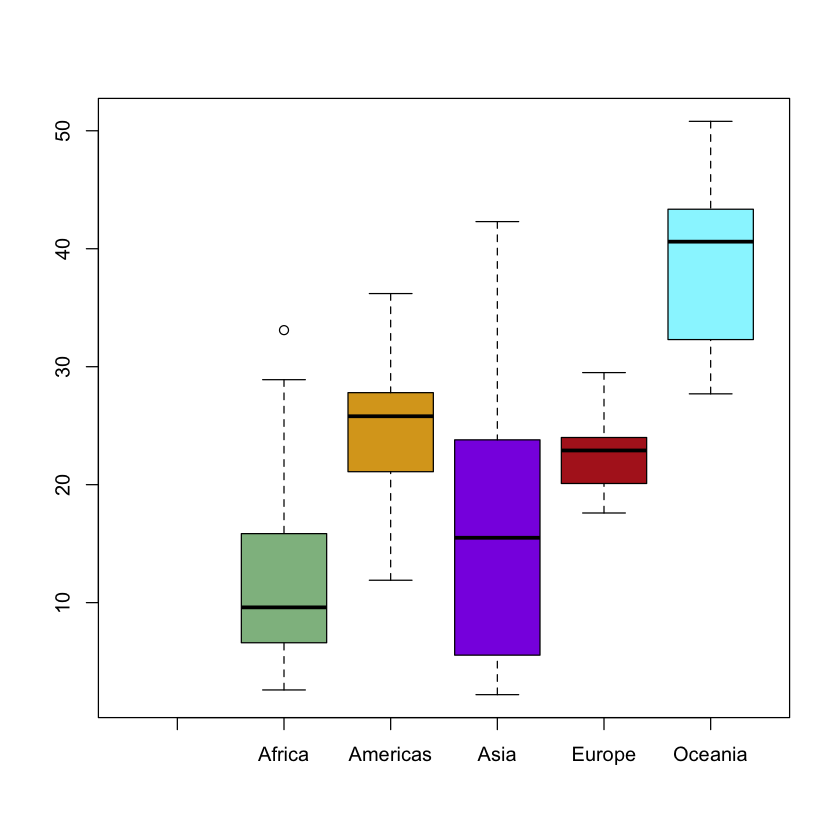

In [115]:
boxplot(value~region,data=obesity_regional,col=(c('cadetblue1','darkseagreen','goldenrod','blueviolet','firebrick')))


## Physical Inactivity

In [159]:
physical_activity <- read.csv("physical_activity.csv")
pa_countries <- merge(obesity_regional,physical_activity[,c("Country","Both.sexes")],by="Country")
nrow(pa_countries)


[1] 136

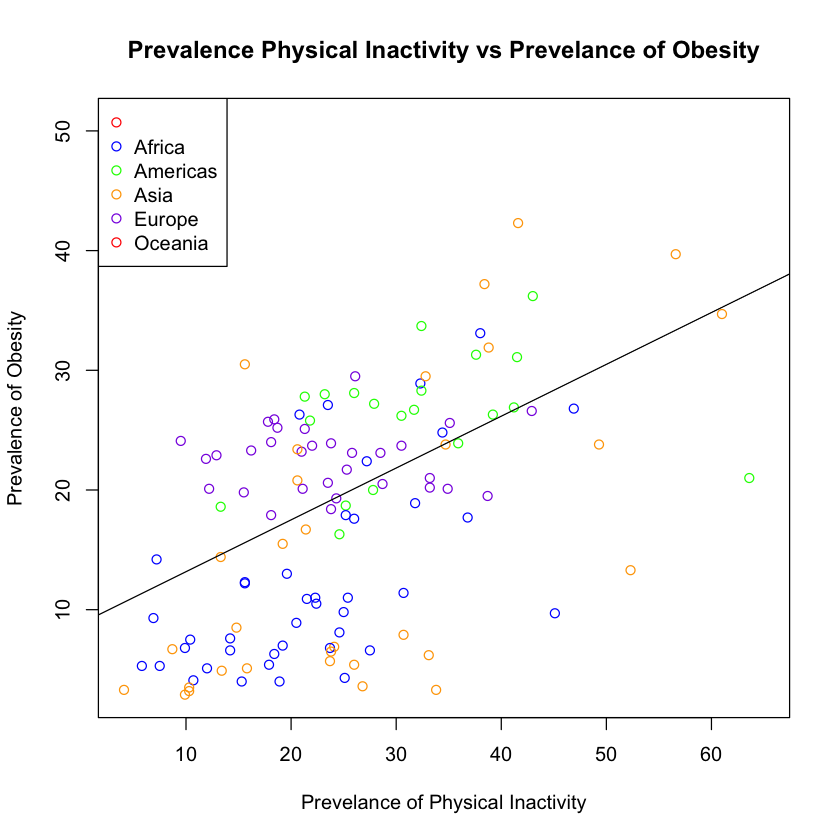

In [189]:
plot(pa_countries$Both.sexes,pa_countries$value,main="Prevalence Physical Inactivity vs Prevelance of Obesity",
     ylab="Prevalence of Obesity",xlab="Prevelance of Physical Inactivity",col=c("red", "blue", "green", "orange","blueviolet")[pa_countries$region])
reg<-lm(pa_countries$value~pa_countries$Both.sexes, data=pa_countries)
legend(x="topleft", legend = levels(pa_countries$region), col=c("red", "blue", "green", "orange","blueviolet"),pch=1)
abline(reg)


In [181]:
summary(reg)


Call:
lm(formula = pa_countries$value ~ pa_countries$Both.sexes, data = pa_countries)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.185  -7.422  -0.140   6.366  31.931 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              8.84298    1.98767   4.449  1.8e-05 ***
pa_countries$Both.sexes  0.43319    0.07043   6.151  8.3e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.934 on 134 degrees of freedom
Multiple R-squared:  0.2202,	Adjusted R-squared:  0.2144 
F-statistic: 37.84 on 1 and 134 DF,  p-value: 8.297e-09
